# Dataset Information
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

Variable         --->Description

Item_Identifier   ---> Unique product ID

Item_Weight       --->Weight of product

Item_Fat_Content  ---->  Whether the product is low fat or not

Item_Visibility     ---->The % of total display area of all products in a store allocated to the particular product

Item_Type           --->The category to which the product belongs

Item_MRP           ----->Maximum Retail Price (list price) of the product

Outlet_Identifier      ---> Unique store ID

Outlet_Establishment_Year     ---> The year in which store was established

Outlet_Size               ---->The size of the store in terms of ground area covered

Outlet_Location_Type     ---->The type of city in which the store is located

Outlet_Type             ----> Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales        --->   Sales of the product in the particulat store. This is the outcome variable to be predicted.


# import modules

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# loading the dataset

In [3]:
df=pd.read_csv("bigdatamart_Train.csv")
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [5]:
df.shape

(8523, 12)

this dataset has 8523 rows and 12 columns 

In [7]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

# data type of attributes

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# statistical info

In [10]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# check unique values in the dataset

In [11]:
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

# preprocessing the dataset

check for null values

In [12]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

we have two attributes (item_weight and outlet_size) which have so many null values

check for categorical attributes

In [13]:
cat_col=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='object':
        cat_col.append(x)
        
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

we do not need Item_Identifier and Outlet_Identifier so we remove them

In [14]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

print the categorical columns

In [18]:
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

total item in the bigmart

In [26]:
print(df["Item_Type"].value_counts().sum())

8523


so in the bigmart there are all over 8523 items for selling

fill the missing values

In [25]:
item_weight_mean= df.pivot_table(values="Item_Weight",index="Item_Identifier")
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


we are using the Item_Identifier as index to find the particular location of missing values

print the rows which have missing values

In [27]:
miss_bool=df["Item_Weight"].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [37]:
#fill the missing values with mean
for i, item in enumerate(df["Item_Identifier"]):
    if miss_bool [i]:
        if item in item_weight_mean:
            df["Item_Weight"][i] = item_weight_mean.loc[item]["Item_Weight"]
        else:
            df["Item_Weight"][i]=np.mean(df["Item_Weight"])

In [38]:
df["Item_Weight"].isnull().sum()

0

we are using the Outlet_Type as index to find the particular location of missing values  in outlet size

In [33]:
outlet_size_mode = df.pivot_table(values="Outlet_Size",columns="Outlet_Type", aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [35]:
miss_bool=df["Outlet_Size"].isnull()
df.loc[miss_bool, "Outlet_Size"] = df.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [36]:
df['Outlet_Size'].isnull().sum()

0

check Item_Visibility which has 0

In [40]:
sum(df["Item_Visibility"]==0)

526

so column of Item_Visibility has 526 rows with 0 ,we should replace this 0 values with mean values

In [61]:
df["Item_Visibility"]=df.loc[:,"Item_Visibility"].replace([0], [df["Item_Visibility"].mean()])
df["Item_Visibility"]

0       0.016047
1       0.019278
2       0.016760
3       0.066132
4       0.066132
          ...   
8518    0.056783
8519    0.046982
8520    0.035186
8521    0.145221
8522    0.044878
Name: Item_Visibility, Length: 8523, dtype: float64

In [62]:
#combine item fat content
df["Item_Fat_Content"] =  df["Item_Fat_Content"].replace({'LF':'Low Fat', 'reg':'Regular','low fat':'Low Fat'})
df["Item_Fat_Content"].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

# target variable

Item_Outlet_Sales

# Creation of new attributes

In [63]:
#creating new name of Item_Identifier and store them in meaning full name
df["New_Item_Type"]=df["Item_Identifier"].apply(lambda x: x[:2])
df["New_Item_Type"]

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [64]:
df["New_Item_Type"]=df["New_Item_Type"].map({'FD':'Food','NC':"Non-Consumable",'DR':"Drinks"})
df["New_Item_Type"].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [65]:
#we are adding Non-Consumable produts in attribute of Item_Fat_Content as Non-Edible
df.loc[df["New_Item_Type"]== 'Non-Consumable',"Item_Fat_Content"]= "Non-Edible"
df["Item_Fat_Content"].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [66]:
#create small values for Outlet_Establishment_Year
df['Outlet_Year']= 2013-df["Outlet_Establishment_Year"]
df['Outlet_Year']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Year, Length: 8523, dtype: int64

In [67]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Year
0,FDA15,9.30000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,10.65059,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93000,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


# Exploratory Data Analysis

# countplot of variables

[Text(0, 0, 'Dairy'),
 Text(0, 0, 'Soft Drinks'),
 Text(0, 0, 'Meat'),
 Text(0, 0, 'Fruits and Vegetables'),
 Text(0, 0, 'Household'),
 Text(0, 0, 'Baking Goods'),
 Text(0, 0, 'Snack Foods'),
 Text(0, 0, 'Frozen Foods'),
 Text(0, 0, 'Breakfast'),
 Text(0, 0, 'Health and Hygiene'),
 Text(0, 0, 'Hard Drinks'),
 Text(0, 0, 'Canned'),
 Text(0, 0, 'Breads'),
 Text(0, 0, 'Starchy Foods'),
 Text(0, 0, 'Others'),
 Text(0, 0, 'Seafood')]

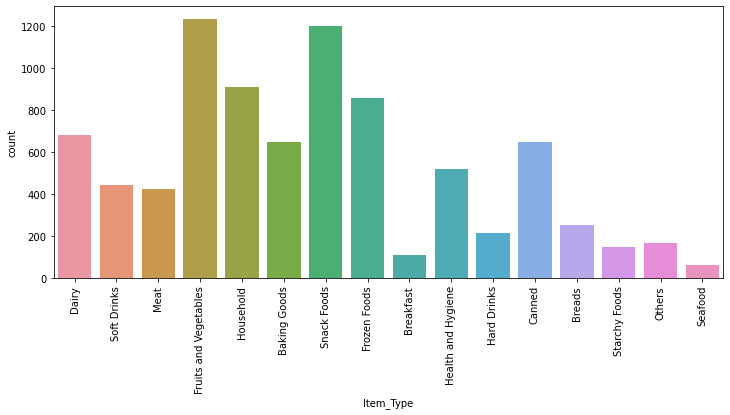

In [100]:
plt.figure(figsize=(12,5))
l=list(df['Item_Type'].unique())
chart=sns.countplot(df['Item_Type'])
chart.set_xticklabels(labels=l,rotation=90)

Fruits and Vegetables  and Snack Foods are in high quantity while sea foods are in low quantity

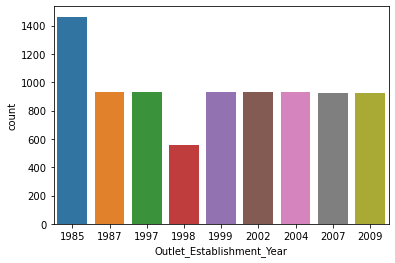

In [101]:
sns.countplot(df['Outlet_Establishment_Year'])

in bigmart data 1985 is repeating so many times 

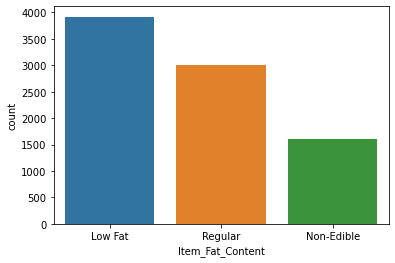

In [70]:
sns.countplot(df['Item_Fat_Content'])

low fat products are in high quantity and Non-Edible are in low quantity

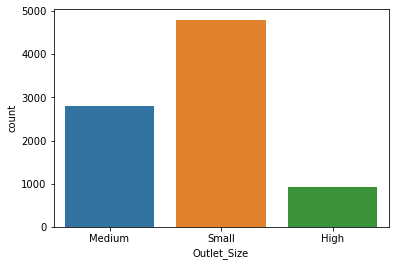

In [81]:
sns.countplot(df['Outlet_Size'])

in bigmart small outlet size products are in high quantity

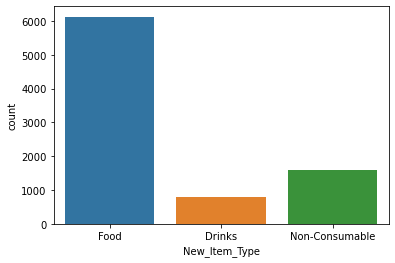

In [82]:
sns.countplot(df['New_Item_Type'])

it the bigmart food products are in high quantity and drinks are in low quantity

# distplot of variables for getting more information about the attributes 

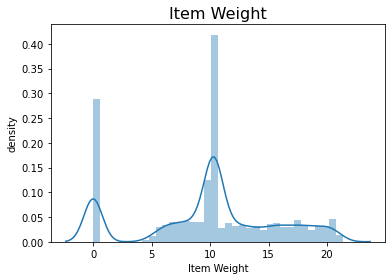

In [84]:
sns.distplot(df["Item_Weight"])
plt.title("Item Weight",fontsize=16)
plt.xlabel("Item Weight")
plt.ylabel("density")
plt.show()

the item weight mean is higher because we fill the missing values with the mean. item weight 10 is in high density

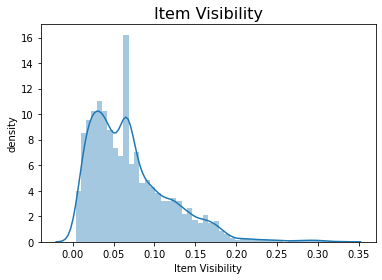

In [85]:
sns.distplot(df["Item_Visibility"])
plt.title("Item Visibility",fontsize=16)
plt.xlabel("Item Visibility")
plt.ylabel("density")
plt.show()

Item Visibility has high density between 0.01 to 0.05 

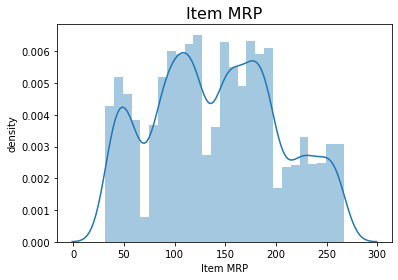

In [86]:
sns.distplot(df["Item_MRP"])
plt.title("Item MRP",fontsize=16)
plt.xlabel("Item MRP")
plt.ylabel("density")
plt.show()

items are in high density between 100 to 200 MRP. Cheap products are below the 100 MRP and costly products are between 200 to 250 MRP

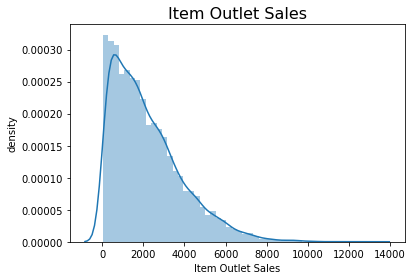

In [87]:
sns.distplot(df["Item_Outlet_Sales"])
plt.title("Item Outlet Sales",fontsize=16)
plt.xlabel("Item Outlet Sales")
plt.ylabel("density")
plt.show()

so value is so high and Item_Outlet_Sales data is in left skewed so we normalised this

In [88]:
#log transformation for normalising the data of Item_Outlet_Sales 
df["Item_Outlet_Sales"]=np.log(1+df["Item_Outlet_Sales"])

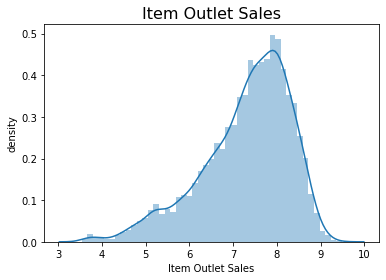

In [89]:
sns.distplot(df["Item_Outlet_Sales"])
plt.title("Item Outlet Sales",fontsize=16)
plt.xlabel("Item Outlet Sales")
plt.ylabel("density")
plt.show()

now data is in uniform distributed and right skewed with less error

# correlation matrix

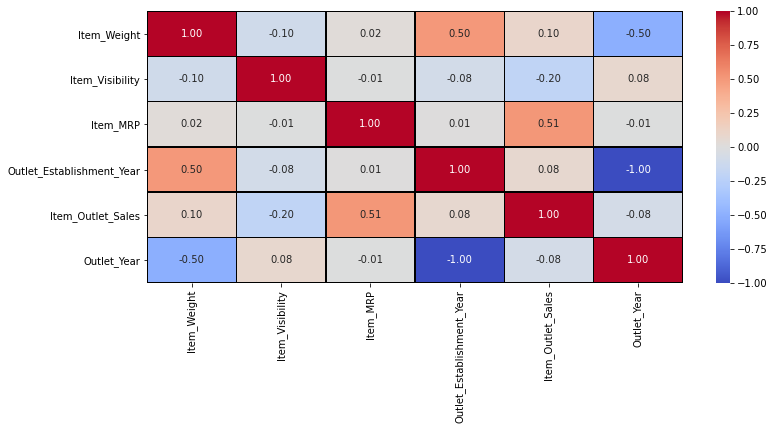

In [102]:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5)) 
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="black",fmt='.2f',cmap='coolwarm')

item mrp is highly positive correlated with target variable and item weight is highly negative correlated with target variables so these varibles impact high on outlet sales

In [103]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Year
0,FDA15,9.30000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,Food,14
1,DRC01,5.92000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,Drinks,4
2,FDN15,17.50000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,Food,14
3,FDX07,10.65059,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,6.597664,Food,15
4,NCD19,8.93000,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451,Non-Consumable,26


# Label Encoding

In [104]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["outlet"] = le.fit_transform(df["Outlet_Identifier"])
cat_col=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type','New_Item_Type']
for col in cat_col:
    df[col] = le.fit_transform(df[col])

# Onehot Encoding 

In [105]:
df =pd.get_dummies(df,columns=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','New_Item_Type'])
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Year,outlet,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDA15,9.30000,0.016047,4,249.8092,OUT049,1999,8.225808,14,9,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92000,0.019278,14,48.2692,OUT018,2009,6.096776,4,3,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50000,0.016760,10,141.6180,OUT049,1999,7.648868,14,9,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,10.65059,0.066132,6,182.0950,OUT010,1998,6.597664,15,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93000,0.066132,9,53.8614,OUT013,1987,6.903451,26,1,...,0,0,1,0,1,0,0,0,0,1


# Input split

In [118]:
X=df.drop(columns=['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Item_Outlet_Sales'])
y=df['Item_Outlet_Sales']

# Model training

In [119]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    # train the model
    model.fit(X, y)
    
    # predict the training set
    pred = model.predict(X)
    
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Model Report")
    print("MSE:",mean_squared_error(y,pred))
    print("CV Score:", cv_score)

Model Report
MSE: 0.2880895104639312
CV Score: 0.28927506163757716


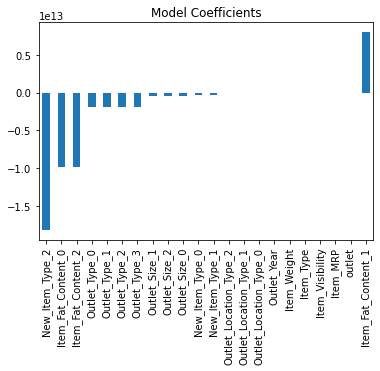

In [120]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 0.4281166030057891
CV Score: 0.42901802361866037


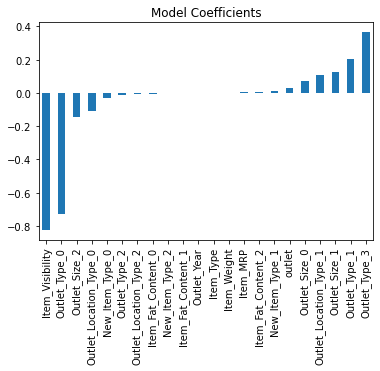

In [121]:
model = Ridge(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 0.7628688679102086
CV Score: 0.7630789166281843


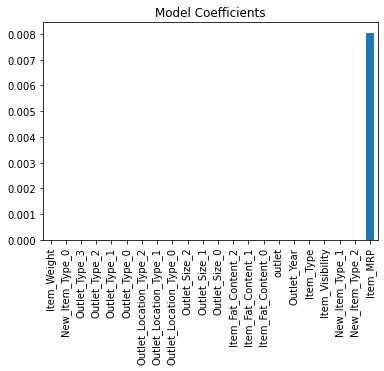

In [123]:
model = Lasso()
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 2.7767015319289398e-34
CV Score: 0.573007719813196


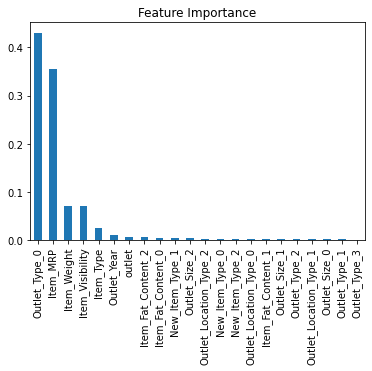

In [124]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

Model Report
MSE: 0.041740729459662416
CV Score: 0.3056823357011956


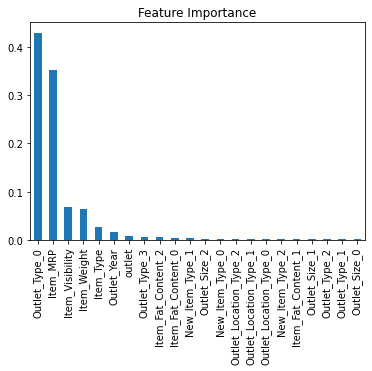

In [125]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

LinearRegression model is bet from all above models because LinearRegression model has less mean squared error and CV score so it is best model for prediction let's save it

# Serialization¶

In [126]:
import joblib
joblib.dump(LinearRegression,"bigmartProject.pkl")

['bigmartProject.pkl']